### CA2 PART A: REGRESSION
<b>Submitted by:</b> Koh Kai Feng, Jason <br>

In [1]:
## Import misc libraries 
#########################
from datetime import datetime
import time

start_time = time.time()
print("Last compiled : ", datetime.today())

Last compiled :  2020-02-04 21:08:53.877424


In [2]:
## Import required libraries 
#############################
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500) # number of rows to be displayed

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset
## Files: kc_house_data.csv
################################

ds = pd.read_csv('./dataset/kc_house_data.csv')

In [3]:
## Dataset exploration (rows:columns)
######################################
old = len(ds)
ds.shape

(21613, 21)

In [4]:
## Dataset exploration determine the datatype
##############################################
ds.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

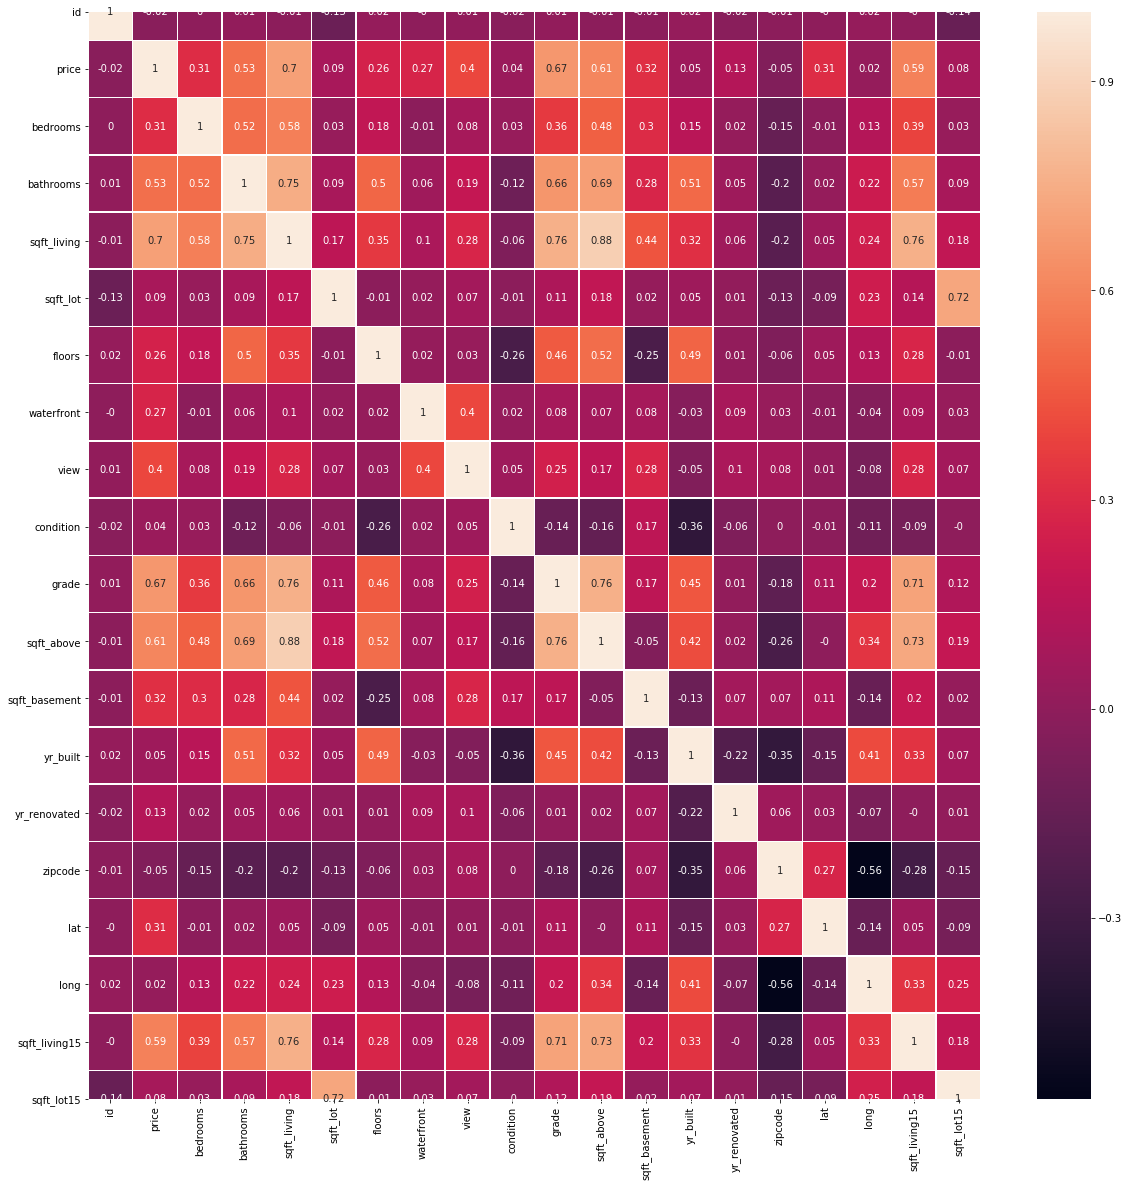

In [5]:
## BEFORE Feature Engineering
##
## Compute pair wise correlation for all columns 
## Note(1): Use the heatmap function from seaborn to plot the correlation matrix
## Note(2): Annot = True to print the values inside the square
#################################################################################
correlation_matrix = ds.corr().round(2)

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

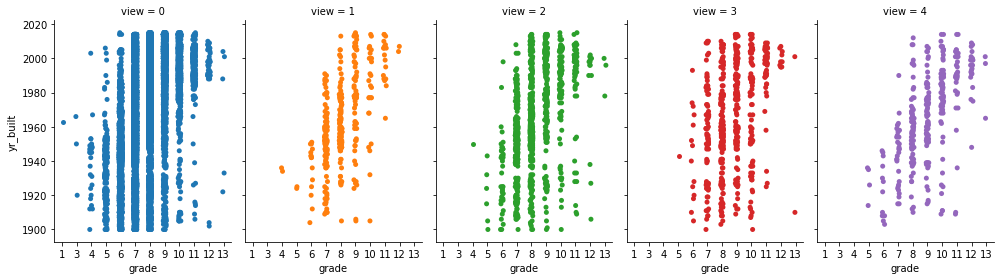

In [6]:
## Data Exploration
## Note(1): Trying to determine the relation between the view, grade and year built. 
## Note(2): The below chart shows that the newer houses have better grades but we can not say much about the change in the view.
################################################################################################################################
sns.catplot(x="grade", y="yr_built",
                hue="view", col="view",
                data=ds, kind="strip",
                height=4, aspect=.7, jitter=1)

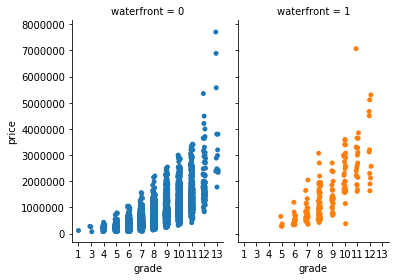

In [7]:
## Data Exploration
## Note(1): Trying to determine the correlation between waterfront in relation of grade and price. 
## Note(2): Better grade = higher price, however != to having waterfront (onehot)
################################################################################################################################
sns.catplot(x="grade", y="price",
                hue="waterfront", col="waterfront",
                data=ds, kind="strip",
                height=4, aspect=.7, jitter=1)

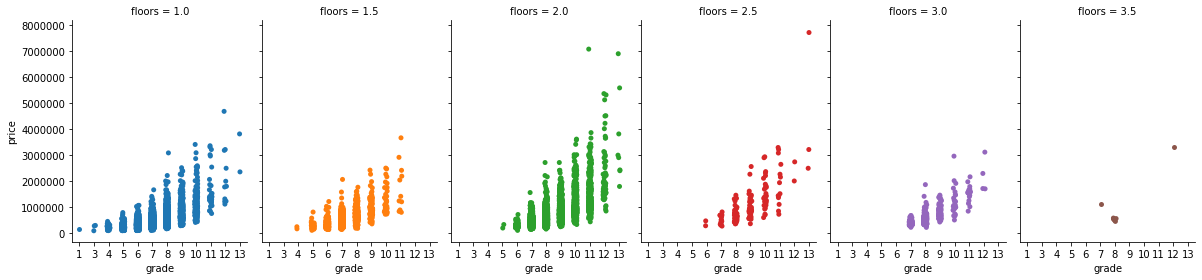

In [8]:
## Data Exploration
## Note(1): Trying to determine the correlation between floors in relation of grade and price. 
## Note(2): No. of floors != higher price (onehot)
################################################################################################################################
sns.catplot(x="grade", y="price",
                hue="floors", col="floors",
                data=ds, kind="strip",
                height=4, aspect=.7, jitter=1)

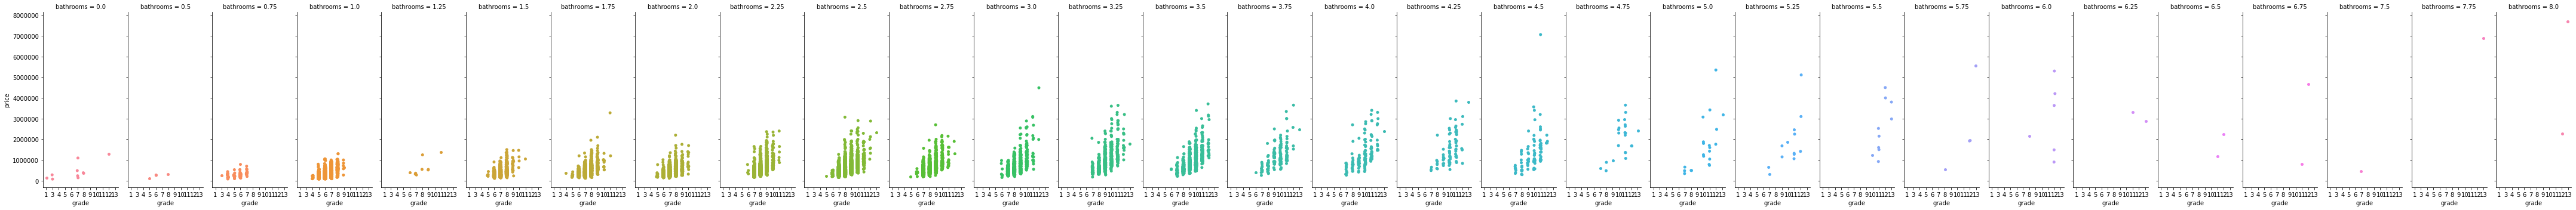

In [9]:
## Data Exploration
## Note(1): Trying to determine the correlation between bathrooms in relation of grade and price. 
## Note(2): More bathrooms = higher price (ordinal)
################################################################################################################################
sns.catplot(x="grade", y="price",
                hue="bathrooms", col="bathrooms",
                data=ds, kind="strip",
                height=5, aspect=0.4, jitter=1)

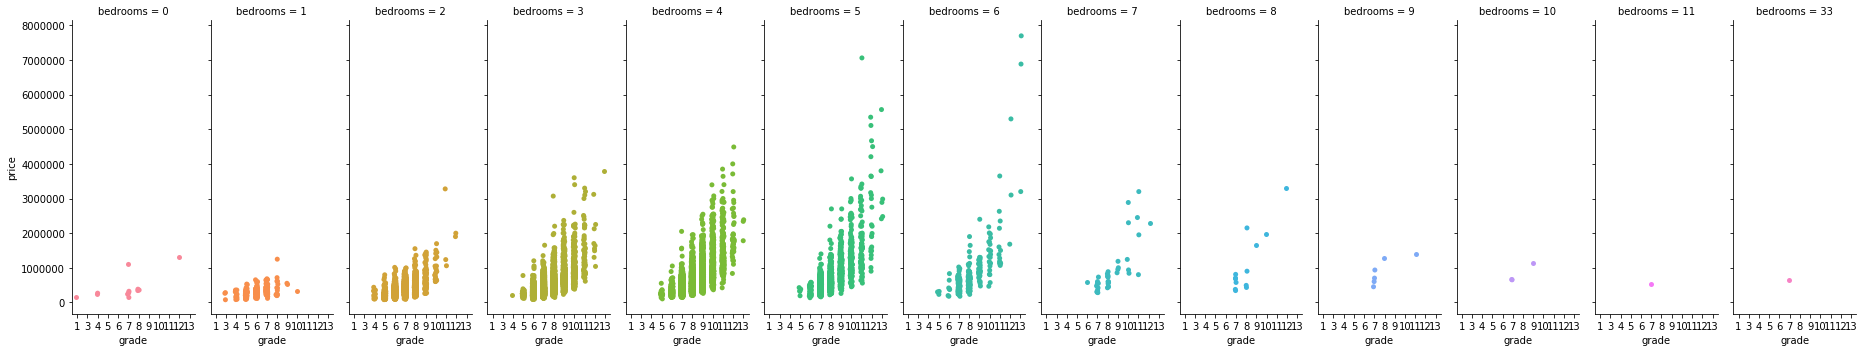

In [10]:
## Data Exploration
## Note(1): Trying to determine the correlation between bedrooms in relation of grade and price. 
## Note(2): no. bedrooms = higher price. (ordinal)
################################################################################################################################
sns.catplot(x="grade", y="price",
                hue="bedrooms", col="bedrooms",
                data=ds, kind="strip",
                height=5, aspect=0.4, jitter=1)

In [11]:
## Cleaning of data
## Note(1): yr_renovated is filled with the year of renovation or 0 if it has not been renovated.
## Note(2): Changing the value for renovated to be 1 instead of the year it has been renovated to normalized the ds.
#####################################################################################################################
for index, row in ds.iterrows():
    if row['yr_renovated'] != 0:
        ds.loc[index, 'yr_renovated'] = 1

In [12]:
## Coverting date(year house sold) and yr_built into one feature house_age
###########################################################################
ds['date'] = pd.to_datetime(ds['date']).dt.year
ds['house_age'] = ds['date'] - ds['yr_built']

for index, row in ds.iterrows():
    if row['house_age'] < 1:
        ds.loc[index, 'house_age'] = 0

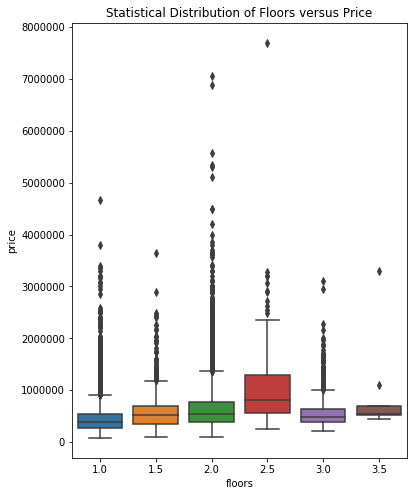

In [13]:
## Detecting possible outliers in price
########################################
plt.figure(figsize=(6,8))
sns.boxplot( x=ds["floors"], y=ds["price"])
plt.title("Statistical Distribution of Floors versus Price")
plt.show();

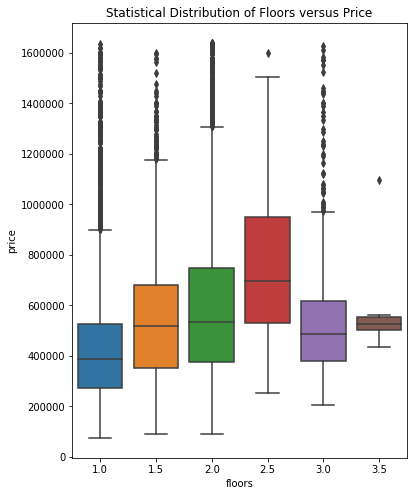

number of outliner(s) removed:  406


In [14]:
## The grey diamonds are indicative of datapoints that deviate by three times the standard deviation 
## in normally distributed data. If following the three sigma rule, this only accounts for .3% of data
## Using a combination of scipy’s zscore() and numpy’s abs() methods to identify and remove the outliers in price.
###################################################################################################################
from scipy import stats
ds = ds[(np.abs(stats.zscore(ds.price)) < 3)]

plt.figure(figsize=(6,8))
sns.boxplot(x=ds["floors"], y=ds["price"])
plt.title("Statistical Distribution of Floors versus Price")
plt.show()
print("number of outliner(s) removed: ", (old - len(ds)))

In [15]:
## After Feature Engineering
##
## Using 80% as a threshold. Sqft_above and sqft_living are too highly correlated, so one must be removed. 
###########################################################################################################

abs(ds.corr() > 0.8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
date,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [16]:
## Ordinal Encoder
###################
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

ds['yr_renovated'] = encoder.fit_transform(ds['yr_renovated'].values.reshape(-1, 1))
#ds['waterfront'] = encoder.fit_transform(ds['waterfront'].values.reshape(-1, 1))
ds['view'] = encoder.fit_transform(ds['view'].values.reshape(-1, 1))
ds['grade'] = encoder.fit_transform(ds['grade'].values.reshape(-1, 1))
ds['condition'] = encoder.fit_transform(ds['condition'].values.reshape(-1, 1))
ds['bedrooms'] = encoder.fit_transform(ds['bedrooms'].values.reshape(-1, 1))
ds['bathrooms'] = encoder.fit_transform(ds['bathrooms'].values.reshape(-1, 1))
#ds['floors'] = encoder.fit_transform(ds['floors'].values.reshape(-1, 1))
ds['house_age'] = encoder.fit_transform(ds['house_age'].values.reshape(-1, 1))


## One hot encoding 
####################

zipcode_encode = pd.get_dummies(ds['zipcode'], prefix='zipcode')
ds = pd.concat([ds,zipcode_encode], axis=1)


waterfront_encode = pd.get_dummies(ds['waterfront'], prefix='waterfront')
ds = pd.concat([ds,waterfront_encode], axis=1)

floors_encode = pd.get_dummies(ds['floors'], prefix='floors')
ds = pd.concat([ds,floors_encode], axis=1)

In [17]:
## Dividing the data into “attributes” and “labels”.
## Note(1): td = training data (without price)
## Note(2): Predicting price based of td
## Removed: 'id','date','price','sqft_living','yr_built','zipcode','bedrooms','bathrooms','floors'
#####################################################

label = ds['price']
attributes = ds.drop(['id','date','price','sqft_living','yr_built','zipcode','waterfront','floors'], axis=1)

In [18]:
## Split dataset into training and testing sets
## Note(1): trying out 70% train 30% test
################################################
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X, y = attributes, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [19]:
## Training Model
##################
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

model = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                          learning_rate=0.1, loss='ls', max_depth=5,
                                          max_features=None, max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, min_impurity_split=None,
                                          min_samples_leaf=1, min_samples_split=2,
                                          min_weight_fraction_leaf=0.0, n_estimators=600,
                                          n_iter_no_change=None, presort='auto',
                                          random_state=None, subsample=1.0, tol=0.0001,
                                          validation_fraction=0.1, verbose=0, warm_start=False)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=600,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
## Prediction Time
###################
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round()})

df

,Actual,Predicted
14031,210000.0,295151.0
19689,375000.0,367542.0
8472,452000.0,462104.0
10331,305000.0,333484.0
3088,325000.0,312505.0
...,...,...
2881,149900.0,196769.0
6928,475000.0,432840.0
4064,383000.0,422075.0
4566,203000.0,207392.0


In [21]:
## Post prediction analysis
## Note(1): Evluating the model
################################
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error \t\t', metrics.mean_absolute_error(y_test, y_pred))  
print(f'Mean Squared Error \t\t', metrics.mean_squared_error(y_test, y_pred))  
print(f'Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f'R2 Score \t\t\t',(r_squared  * 100).round(3),'%')

Mean Absolute Error 		 56488.47848519578
Mean Squared Error 		 7723110414.203734
Root Mean Squared Error:	 87881.22902078541
R2 Score 			 89.025 %


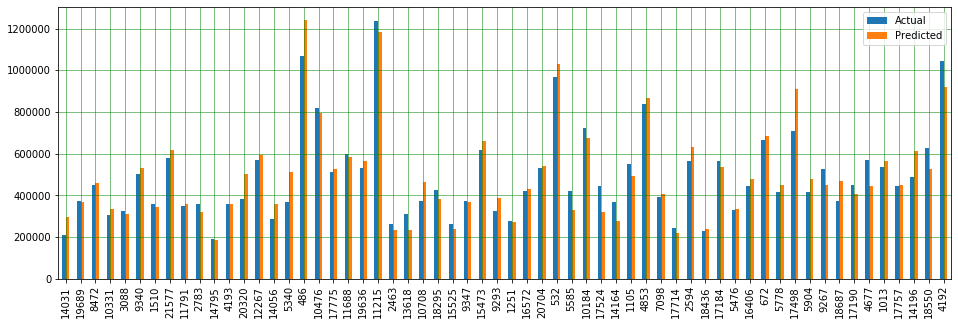

In [22]:
## Post prediction analysis
## Note(1): Plot Bar graph showing the comparison of Actual and Predicted values.
##################################################################################
df1 = df.head(60)
df1.plot(kind='bar',figsize=(16,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

		R2 Score 	 89.025 %


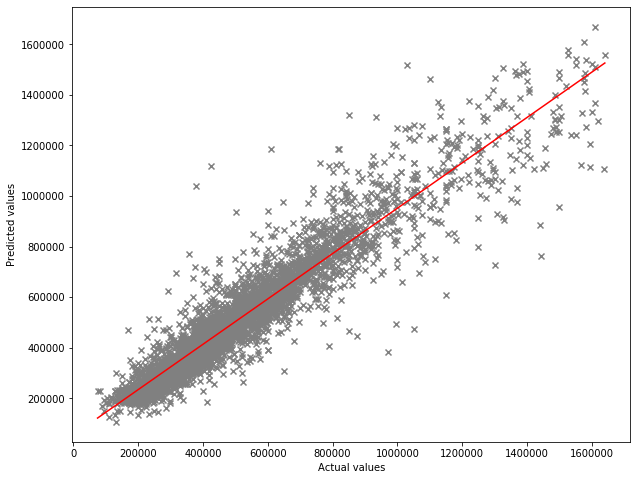

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,marker='x',color='grey')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)),color='red')

print(f'\t\tR2 Score \t',(r_squared  * 100).round(3),'%')

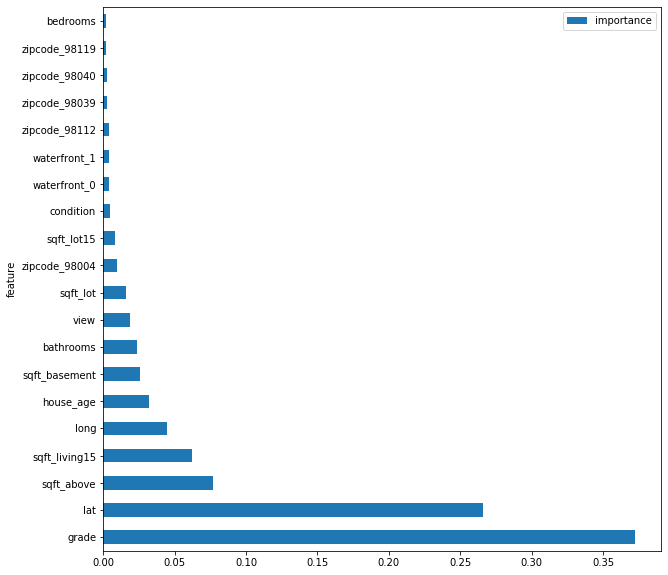

In [24]:
## Post-Prediction analysis
##########################################################################################
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(model.feature_importances_,3)})
importancesplot = importances.sort_values('importance',ascending=False).set_index('feature').head(20)

## OUTPUT
###############################################################################################################
importancesplot.plot(kind='barh', figsize=(10, 10))

In [25]:
importances.sort_values(by=['importance'], ascending=False)

,feature,importance
5,grade,0.372
9,lat,0.266
6,sqft_above,0.077
11,sqft_living15,0.062
10,long,0.045
13,house_age,0.032
7,sqft_basement,0.026
1,bathrooms,0.024
3,view,0.019
2,sqft_lot,0.016


In [26]:
from sklearn.feature_selection import SelectFromModel

model_reduce = SelectFromModel(model, prefit=True, threshold=0.01)

x_train_reduced = model_reduce.transform(X_train)
print(x_train_reduced.shape)

x_test_reduced = model_reduce.transform(X_test)
print(x_test_reduced.shape)

(16965, 11)
(4242, 11)


In [27]:
model_reduce = model.fit(x_train_reduced,y_train)
y_pred_reduce = model_reduce.predict(x_test_reduced)

In [28]:
## Post prediction analysis
## Note(1): Evluating the model after reduced features
#######################################################
r_squared_reduced = r2_score(y_test, y_pred_reduce)

print(f'Mean Absolute Error \t\t', metrics.mean_absolute_error(y_test, y_pred_reduce))  
print(f'Mean Squared Error \t\t', metrics.mean_squared_error(y_test, y_pred_reduce))  
print(f'Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reduce)))
print(f'R2 Score \t\t\t',(r_squared_reduced  * 100).round(3),'%')

Mean Absolute Error 		 59780.42811719673
Mean Squared Error 		 8356418010.330514
Root Mean Squared Error:	 91413.44545705798
R2 Score 			 88.125 %


In [29]:
print('Training score: {}'.format(model.score(x_train_reduced, y_train)))
print('Test score: {}'.format(model.score(x_test_reduced, y_test)))

Training score: 0.957020654744266
Test score: 0.8812490501921093


		R2 Score 	 88.125 %


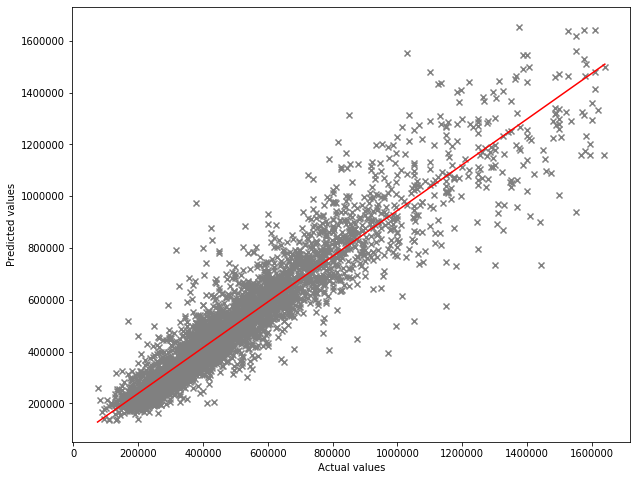

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_reduce,marker='x',color='grey')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_reduce, 1))(np.unique(y_test)),color='red')

print(f'\t\tR2 Score \t',(r_squared_reduced  * 100).round(3),'%')

In [31]:
print("--- Elapsed time  %s seconds ---" % (time.time() - start_time))

--- Elapsed time  76.27392673492432 seconds ---


In [32]:
attributes

,bedrooms,bathrooms,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,...,zipcode_98198,zipcode_98199,waterfront_0,waterfront_1,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,3.0,3.0,5650,0.0,2.0,5.0,1180,0,0.0,47.5112,...,0,0,1,0,1,0,0,0,0,0
1,3.0,8.0,7242,0.0,2.0,5.0,2170,400,1.0,47.7210,...,0,0,1,0,0,0,1,0,0,0
2,2.0,3.0,10000,0.0,2.0,4.0,770,0,0.0,47.7379,...,0,0,1,0,1,0,0,0,0,0
3,4.0,11.0,5000,0.0,4.0,5.0,1050,910,0.0,47.5208,...,0,0,1,0,1,0,0,0,0,0
4,3.0,7.0,8080,0.0,2.0,6.0,1680,0,0.0,47.6168,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,9.0,1131,0.0,2.0,6.0,1530,0,0.0,47.6993,...,0,0,1,0,0,0,0,0,1,0
21609,4.0,9.0,5813,0.0,2.0,6.0,2310,0,0.0,47.5107,...,0,0,1,0,0,0,1,0,0,0
21610,2.0,2.0,1350,0.0,2.0,5.0,1020,0,0.0,47.5944,...,0,0,1,0,0,0,1,0,0,0
21611,3.0,9.0,2388,0.0,2.0,6.0,1600,0,0.0,47.5345,...,0,0,1,0,0,0,1,0,0,0


# Conclusion

<h3>Q1 - How is your prediction task defined? And what is the meaning of the output variable?</h3>
<p>
    <b>Answer :</b>
    <br>
    My prediction task is to predict the sales price of the houses based on a given set of perimeters.
    <br>
    The output variable produced in my predictions is the prices of the houses, it predicts the prices based on a given set of perimeters. 
</p>
_______________________________________________________________________________________________________________

<h3>Q2 - How do you represent your data as features?</h3>
<p>
    <b>Answer :</b>
    <br>
    I made used of the <u>OrdinalEncoder</u> from <u>sklearn</u> and <u>pandas</u>'s <u>one-hot enconding</u> to encode my features
    <br>
    The following is the features i've used to train my model
</p>

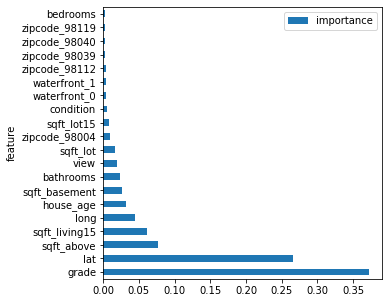

In [33]:
importancesplot.plot(kind='barh', figsize=(5, 5))

<p>
All features except <b>id, date, price, sqft_living</b> and <b>yr_built</b> has either been encoded via Ordinal or one-hot encoding accordingly.
</p>
________________________________________________________________________________________________

<h3>Q3 - Did you process the features in any way?</h3>
<p>
    <b>Answer :</b>
    <br><br>
    Yes. Some basic cleaning and encoding was introduce to make the data set more suitable for machine learning.
    <br><br>
    The <b>date</b> attribute was used in conjunction with the <b>yr_built</b> attribute to create a new feature called <b>house_age</b>. After which, both the date and yr_built attributes were dropped.
    <br><br>
    For <b>price</b> I made used of logarithmic to scale down the value and make it so that the value of price is much more distributed.
    <br><br>
    After which, using a box plot from <i>orn and matplotlib</i> i as able to identify data points that deviate by <b>three times the standard deviation of the price attribute</b>. Following the three sigma rule, any data that was identified, only accounts for .3% of data. With that in mind, using a combination of <i>scipy’s zscore() and numpy’s abs() methods</i>, I was able to identify and remove the outliers in price.
    <br><br>
    Lastly, I checked to see if there is any two attributes that is highly corresponded to each other. Which led me to drop sqft_living.
    <br><br>
    That is all the feature engineering and feature processing done.
</p>
_______________________________________________________________________________________________________________

<h3>Q4 - Did you bring in any additional sources of data?</h3>
<p>
    <b>Answer: </b>
    No
</p>
_______________________________________________________________________________________________________________

<h3>Q5 - How did you select which learning algorithms to use?</h3>
<p>
    <b>Answer: </b>
    <br>
    I've chosen <u>Gradient boosting</u> as the algorithm generally gives better results when compared to other algorithms. Although it is more prone to overfitting and more resource intensieve overall. The small dataset (KC housing) proves to not be a problem in regards to the resourced used (computing time is minimal as recorded). As for overfitting, after fine tuning from selecting the appropriate features the r2 score has became much more consistent.
</p>

<h3>Q6 - Did you try to tune the hyperparameters of the learning algorithm, and in that case how?</h3>
<p>
    <b>Answer:</b>
    <br>
    Yes. Maually adjusting the n-estimators to speed up the training of the model, but not at the expense of accuracy.
</p>
_______________________________________________________________________________________________________________

<h3>Q7 - How do you evaluate the quality of your system?</h3>
<p>
    <b>Answer: </b>
    <br>
     Ultimately I decided to use R2 to evaluate the quality of my model. As there are no fixed threshold limit for RMSE and R2. It is always better to have RMSE as low as possible and R2 as close to 1.
    <ul>
        Final Prediction score:
        <li>Root Mean Squared Error: 91606.27442053745</li>
        <li>R2 Score: 0.88075</li>
    </ul>
</p>

<h3>Q8 - How well does your system compare to a stupid baseline?</h3>
<p>
    <b>Answer: </b>
    <br>
    As there were not stupid baseline provided. The stupid baseline in this scenario consist of a prediction without feature engineering and cleaning. With the <b>Id</b> and <b>date</b> column dropped, using the same GradientBoosting Regressor to predict, which give me the following:
    <ul>
        <b><u>Final Prediction score (stupid baseline)</u></b>
        <li>Root Mean Squared Error: 182826 (round to whole)</li>
        <li>R-Squared: 		 79 % (round to whole)</li>
    </ul>
    <ul>
        <b><u>Final Prediction score (current model)</u></b>
        <li>Root Mean Squared Error: 91606 (round to whole)</li>
        <li>R2 Score: 88 % (round to whole)</li>
    </ul>
    <ul>
        <b><u>Improvements from stupid baseline</u></b>
        <li>Root Mean Squared Error reduced by : 91,220</li>
        <li>R2 Score increased by : 9 % </li>
    </ul>
</p>
_______________________________________________________________________________________________________________

<h3>Q9 - Can you say anything about the errors that the system makes?</h3>
<p>
    <b>Answer: </b>
    <br>
    Generally based on the RMSE value, the higher the value the lower the ability of the model to accurately predict the data. After comparing with my self defined stupid baseline, i concur that my model is accurate.

</p>

<h3>Q10 - Is it possible to say something about which features the model considers important? </h3>
<p>
    <b>Answer: </b>
    <br>
    It would be easier to answer with a graph, as such see the graph below.
    <br>
    The importance of each feature was derived from just the training dataset alone.
</p>

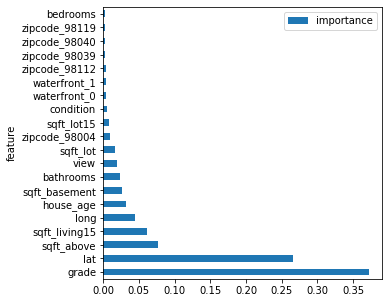

In [34]:
importancesplot.plot(kind='barh', figsize=(5, 5))